In [19]:
import numpy
import scipy
import csv
import pandas as pd

In [20]:
# open the file in universal line ending mode 
df_train = pd.read_csv('train.csv',delimiter=",")
df_test = pd.read_csv('test.csv',delimiter=",")
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [41]:
df_test.head()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,wrkclass_ Federal-gov,wrkclass_ Local-gov,wrkclass_ Never-worked,wrkclass_ Private,...,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,income_ <=50K.,income_ >50K.
0,25,226802,7,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38,89814,9,0,0,50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,28,336951,12,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,44,160323,10,7688,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,18,103497,10,0,0,30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
list(df_test)

['age',
 'fnlwgt',
 'educationnum',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'wrkclass_ ?',
 'wrkclass_ Federal-gov',
 'wrkclass_ Local-gov',
 'wrkclass_ Never-worked',
 'wrkclass_ Private',
 'wrkclass_ Self-emp-inc',
 'wrkclass_ Self-emp-not-inc',
 'wrkclass_ State-gov',
 'wrkclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupa

In [24]:
df_train = df_train.drop(['wrkclass_ ?','occupation_ ?','nativecountry_ ?'], 1)
df_test = df_test.drop(['wrkclass_ ?','occupation_ ?','nativecountry_ ?'], 1)

In [49]:
df_train.columns.get_loc('income_ <=50K')

106

In [30]:
df_test.insert(79,'nativecountry_ Holand-Netherlands',0)

In [42]:
df_test.insert(0,'Bias_Term',1)
df_train.insert(0,'Bias_Term',1)

In [43]:
list(df_test)

['Bias_Term',
 'age',
 'fnlwgt',
 'educationnum',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'wrkclass_ Federal-gov',
 'wrkclass_ Local-gov',
 'wrkclass_ Never-worked',
 'wrkclass_ Private',
 'wrkclass_ Self-emp-inc',
 'wrkclass_ Self-emp-not-inc',
 'wrkclass_ State-gov',
 'wrkclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',

In [44]:
list(df_train)

['Bias_Term',
 'age',
 'fnlwgt',
 'educationnum',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'wrkclass_ Federal-gov',
 'wrkclass_ Local-gov',
 'wrkclass_ Never-worked',
 'wrkclass_ Private',
 'wrkclass_ Self-emp-inc',
 'wrkclass_ Self-emp-not-inc',
 'wrkclass_ State-gov',
 'wrkclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',

In [45]:
df_test.shape

(16281, 108)

In [46]:
df_train.shape

(32561, 108)

In [34]:
df_train.columns.difference(df_test.columns)

Index(['income_ <=50K', 'income_ >50K'], dtype='object')

In [35]:
#Accessing columns
df_train['age'].head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [36]:
#Accessing rows, columns
df_train.loc[df_train['age'] >= 50, 'age']

1        50
3        53
7        52
21       54
24       59
25       56
27       54
41       53
45       57
46       53
53       50
67       53
74       79
77       67
81       52
83       59
85       53
90       57
100      76
112      56
115      53
116      56
118      55
140      61
144      70
148      64
154      52
157      71
160      68
169      66
         ..
32448    61
32454    50
32459    85
32460    62
32463    58
32465    66
32467    55
32469    58
32470    50
32479    64
32481    52
32487    51
32489    61
32490    60
32494    82
32498    57
32501    71
32504    50
32507    50
32515    66
32518    57
32522    58
32525    81
32533    54
32539    71
32542    72
32548    65
32554    53
32558    58
32560    52
Name: age, dtype: int64

In [51]:
data_train=df_train.as_matrix()
data_test=df_test.as_matrix()

In [60]:
X_train=[d[0:106] for d in data_train]
X_test=[d[0:106] for d in data_test]
Y_train=[d[107] for d in data_train]
Y_test=[d[107] for d in data_test]

In [67]:
X_train=numpy.matrix(X_train)
X_test=numpy.matrix(X_test)
Y_train=numpy.matrix(Y_train)
Y_train=Y_train.transpose()
Y_test=numpy.matrix(Y_test)
Y_test=Y_test.transpose()

In [70]:
X_test.shape

(16281, 106)

In [15]:
y=[(data[i][14]==' >50K') for i in range(len(data))]

In [16]:
y[:10]

[False, False, False, False, False, False, False, True, True, True]

In [17]:
temp_pos=[]
temp_neg=[]
for i in range(len(data)):
    if (y[i]==1):
        temp_pos.append(data[i][2])
    else:
        temp_neg.append(data[i][2])
        

In [18]:
max(temp_pos)

1226583

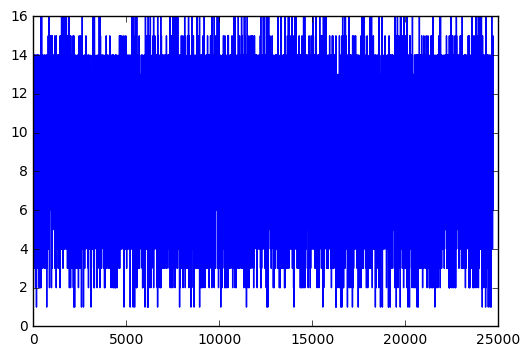

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(temp_neg)),temp_neg)
plt.show()

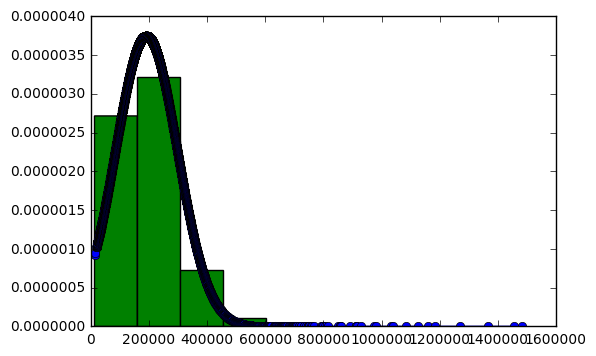

In [19]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(temp_neg)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show()                   #use may also need add this 

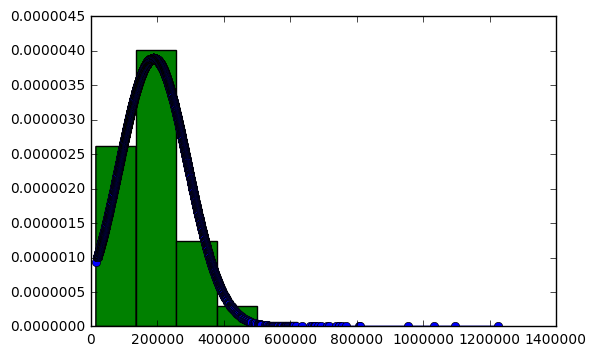

In [20]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(temp_pos)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show()                   #use may also need add this 